In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load the dataset
dataset = pd.read_csv('./emp.csv')
print(dataset)

    Experience (Years)  Salary ($)
0                    1       30000
1                    2       35000
2                    3       40000
3                    4       45000
4                    5       50000
5                    6       60000
6                    7       65000
7                    8       70000
8                    9       80000
9                   10       85000
10                  11       90000
11                  12       95000
12                  13      100000


In [3]:
# Define features (X) and target (y)
X = dataset.iloc[:, 0:1].values  # Features (e.g., Experience)
y = dataset.iloc[:, 1].values    # Target (e.g., Salary)

In [4]:
# Convert salary into binary classification (1 if above median, 0 if below)
median_salary = np.median(y)
y = (y > median_salary).astype(int)  # 1 if salary > median, else 0

In [5]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Train Support Vector Classifier
sv_classifier = SVC(kernel='rbf', random_state=42)
sv_classifier.fit(X_train, y_train)


SVC(random_state=42)

In [8]:
# Make predictions
y_pred = sv_classifier.predict(X_test)


In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [10]:
# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [11]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1 0]
 [0 2]]


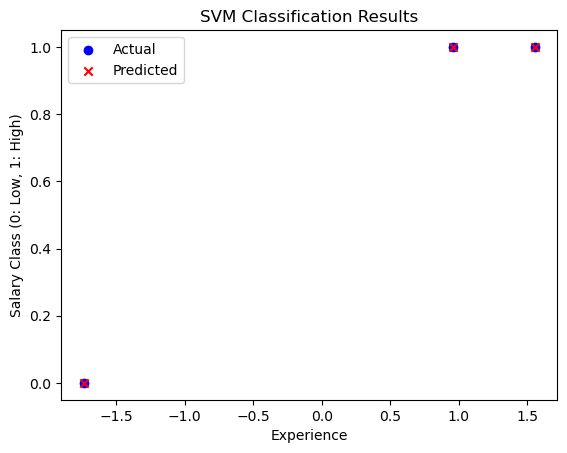

In [12]:
# Visualize classification results
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted", marker='x')
plt.title('SVM Classification Results')
plt.xlabel('Experience')
plt.ylabel('Salary Class (0: Low, 1: High)')
plt.legend()
plt.show()
